&copy; 2025 | Created by Abdan Hafidz

# Introduction To Graph Theory

Modul ini berisi penjelasan terkait implementasi berbagai algoritma pencarian jalur terpendek serta traversal graf yang telah diterapkan dalam kode Python. Algoritma yang digunakan meliputi:
* DFS (Depth First Search)
* BFS (Breadth First Search)
* Backtracking
* Dijkstra
* A (A Star Algorithm)*
* Bellman-Ford
* Floyd-Warshall


# Import Utilities

In [1]:
from abdangraph.graph import *
from abdangraph.shortest_path_algorithm import *
from abdangraph.traversal import *
import math
import random
import pandas as pd
import heapq
import matplotlib.pyplot as plt

c:\Users\asus\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
import inspect

def psource(*functions):
    "Print the source code for the given function(s)."
    code = '\n\n'.join(inspect.getsource(fn) for fn in functions)
    print(code)

# Graph Representation

Graf dapat direpresentasikan dalam berbagai bentuk, di antaranya:

**Matriks Adjacency**: Merepresentasikan graf dalam bentuk matriks, di mana elemen `(i, j)` menyatakan bobot dari node `i` ke node `j`.

**List Adjacency**: Merepresentasikan graf menggunakan struktur dictionary atau list yang menyimpan tetangga dari setiap node.

Dalam implementasi ini, kita menggunakan List Adjacency yang lebih efisien dalam menyimpan graf yang bersifat sparse (jarang terhubung).

Sebagai contoh kita dapat membuat graf berikut ini dengan menggunakan `newGraph`

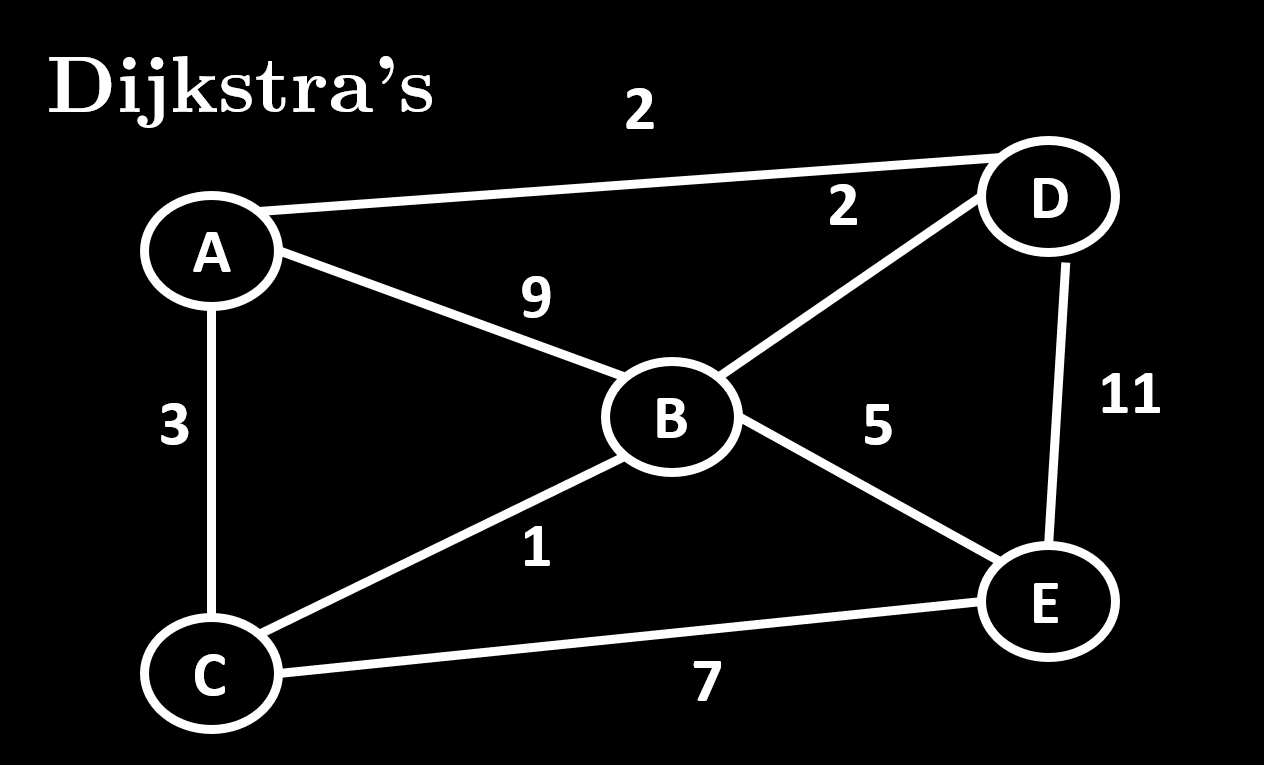

In [3]:
psource(new_graph)

def new_graph(number_of_nodes = 1, nodes_name = {}):
    adj = dict()
    if(nodes_name != None):
        for node in nodes_name:
            adj[node] = list()
    else:
        for i in range(1,number_of_nodes+1):
            adj[i] = list()
    return adj



Fungsi `new_graph()` bertujuan untuk membuat struktur graf dalam bentuk adjacency list menggunakan dictionary (`dict`). Fungsi ini memungkinkan pembuatan graf dengan dua pendekatan: berdasarkan nama node yang diberikan dalam parameter `nodes_name`, atau dengan jumlah node tertentu yang ditentukan oleh `number_of_nodes`. Jika `nodes_name` diberikan, maka dictionary `adj` akan diisi dengan node sesuai nama yang ada dalam dictionary tersebut, di mana setiap node diinisialisasi dengan list kosong untuk menampung koneksi ke node lain.

Jika `nodes_name` tidak diberikan, maka fungsi akan membuat sejumlah node sesuai `number_of_nodes`, menggunakan angka sebagai nama node secara otomatis. Dengan struktur ini, `adj` menjadi representasi adjacency list yang fleksibel dan dapat digunakan untuk berbagai operasi graf, seperti penambahan edge atau traversal.


In [4]:
graph = new_graph(
    number_of_nodes = 5,
    nodes_name = {"A","B","C","D","E"}
)

Kita dapat membuat koneksi / keterhubungan antar node pada graf menggunakan fungsi `add_connection`

In [5]:
psource(add_connection)

def add_connection(adj, u, v, w, directed = False):
    if(not directed):
        adj[u].append({v: w})
        adj[v].append({u: w})
    else:
        adj[u].append({v: w})



Fungsi `add_connection()` digunakan untuk menambahkan **edge** atau **sisi** antara dua node dalam graf berbobot. Fungsi ini menerima parameter `adj` (graf dalam bentuk adjacency list), `u` (node asal), `v` (node tujuan), `w` (bobot edge), dan `directed` (opsional, default `False`). Jika `directed` bernilai `False`, maka edge ditambahkan **dua kali** —dari `u` ke `v` dan sebaliknya (`v` ke `u`), menjadikannya **graf tidak berarah** . Namun, jika `directed` bernilai `True`, edge hanya ditambahkan dari `u` ke `v`, menjadikannya **graf berarah** . Setiap koneksi direpresentasikan dalam bentuk dictionary `{v: w}`, yang menyimpan bobot dari `u` ke `v`.


In [6]:
add_connection(graph, "A", "B", 9)
add_connection(graph, "A", "C", 3)
add_connection(graph, "A", "D", 2)
add_connection(graph, "B", "C", 1)
add_connection(graph, "B", "D", 2)
add_connection(graph, "B", "E", 5)
add_connection(graph, "C", "E", 7)
add_connection(graph, "D", "E", 11)

Daftar ketetanggan atau **Adjacency List** dari graf yang sudah dibuat adalah sebagai berikut

In [7]:
graph

{'C': [{'A': 3}, {'B': 1}, {'E': 7}],
 'E': [{'B': 5}, {'C': 7}, {'D': 11}],
 'A': [{'B': 9}, {'C': 3}, {'D': 2}],
 'B': [{'A': 9}, {'C': 1}, {'D': 2}, {'E': 5}],
 'D': [{'A': 2}, {'B': 2}, {'E': 11}]}

Fungsi `add_connection()` pada dasarnya merepresentasikan graf menggunakan **adjacency list** , di mana setiap node (`u`) memiliki daftar koneksi ke node lain (`v`) dalam bentuk **list** yang berisi dictionary `{v: w}`. Representasi ini lebih hemat memori untuk **graf sparse** (graf dengan sedikit edge dibandingkan jumlah total kemungkinan koneksi).

Namun, meskipun secara struktur lebih mendekati **adjacency list** , pendekatan ini dapat diarahkan ke paradigma **adjacency matrix** dengan sedikit perubahan. Dalam adjacency matrix, setiap elemen `adj[u][v]` menyimpan bobot koneksi langsung dari `u` ke `v`, sedangkan elemen yang tidak memiliki koneksi biasanya bernilai `0` atau `inf`.

Dengan memanfaatkan cara akses berikut:

```python
for connection in adj[start]:
    neighbor = list(connection.keys())[0]
```

Kita sebenarnya sudah menerapkan logika adjacency matrix secara implisit, karena setiap node memiliki representasi bobot terhadap node lainnya. Jika ingin lebih eksplisit, kita dapat menggunakan:

```python
adj[u][v] = w
```


di mana `adj` diubah dari list berisi dictionary menjadi dictionary dua dimensi (`dict of dict`).

Pendekatan ini menunjukkan bahwa meskipun implementasi awal lebih mirip adjacency list, secara fleksibel bisa diadaptasi menjadi adjacency matrix, terutama jika dibutuhkan operasi **akses langsung antar node** (`O(1)`) dibandingkan traversal elemen dalam list (`O(k)`, dengan `k` adalah jumlah tetangga suatu node).


Dengan matriks ketetanggan atau **Adjacency Matrix** maka graf dapat direpresentasi seperti berikut

In [8]:
import numpy as np

def adj_list_to_matrix(graph):
    nodes = sorted(graph.keys())  # Ambil semua node dan urutkan
    node_index = {node: i for i, node in enumerate(nodes)}  # Mapping node ke index
    n = len(nodes)
    
    # Inisialisasi matrix dengan nilai inf (tak terhingga) untuk menunjukkan tidak ada edge
    matrix = np.full((n, n), float('inf'))
    np.fill_diagonal(matrix, 0)  # Jarak ke diri sendiri adalah 0
    
    # Mengisi matrix dengan bobot dari adjacency list
    for node, edges in graph.items():
        for edge in edges:
            for neighbor, weight in edge.items():
                matrix[node_index[node]][node_index[neighbor]] = weight
    
    return matrix, nodes

In [9]:
import pandas as pd
adj_list_to_matrix(graph)

(array([[ 0.,  9.,  3.,  2., inf],
        [ 9.,  0.,  1.,  2.,  5.],
        [ 3.,  1.,  0., inf,  7.],
        [ 2.,  2., inf,  0., 11.],
        [inf,  5.,  7., 11.,  0.]]),
 ['A', 'B', 'C', 'D', 'E'])

| Aspek                 | Adjacency List                               | Adjacency Matrix                           |
|-----------------------|--------------------------------------------|-------------------------------------------|
| **Penggunaan Memori**  | Efisien untuk graf **sparse** (sedikit edge), hanya menyimpan koneksi yang ada. | Boros memori, karena menyimpan semua kemungkinan koneksi meskipun tidak ada edge. |
| **Kecepatan Akses Edge** | Butuh pencarian dalam list (`O(k)`, dengan `k` adalah jumlah tetangga). | Akses langsung dalam **O(1)** menggunakan indeks matriks (`adj[u][v]`). |
| **Kecepatan Traversal** | Lebih cepat untuk menyusuri tetangga langsung (`O(V + E)`). | Lebih lambat (`O(V^2)`) karena semua kemungkinan koneksi diperiksa, bahkan yang tidak ada. |
| **Cocok untuk**       | **Graf sparse**, seperti jaringan sosial atau graf dengan hubungan terbatas. | **Graf dense**, seperti algoritma yang sering membutuhkan akses langsung antar node. |
| **Kemudahan Implementasi** | Lebih fleksibel, bisa menggunakan dictionary atau list untuk menyimpan edge. | Mudah diimplementasikan sebagai array 2D atau dictionary dua dimensi. |
| **Penambahan Edge**    | **O(1)** jika menggunakan list, tetapi bisa lebih lambat jika memeriksa keberadaan edge sebelumnya. | **O(1)** karena langsung mengubah elemen matriks `adj[u][v]`. |
| **Pencarian Tetangga** | Mudah diakses langsung dari adjacency list tanpa perlu memeriksa semua node. | Harus memeriksa satu baris dalam matriks untuk mengetahui semua tetangga. |
| **Kompleksitas Penyimpanan** | **O(V + E)** (hanya menyimpan koneksi yang ada). | **O(V²)** (semua kemungkinan koneksi disimpan, meskipun tidak digunakan). |


# Graph Traversal

### Depth-First-Search (DFS)

Depth-First Search (DFS) adalah salah satu teknik dasar dalam penelusuran graf. Algoritma ini dimulai dari sebuah simpul awal, lalu menjelajahi semua simpul lain yang dapat dicapai melalui sisi-sisi graf.

DFS selalu mengikuti satu jalur selama masih menemukan simpul baru. Jika tidak ada lagi simpul yang bisa dijangkau dari jalur tersebut, algoritma akan kembali ke simpul sebelumnya untuk mengeksplorasi bagian graf lainnya. Dalam prosesnya, DFS mencatat simpul-simpul yang sudah dikunjungi agar setiap simpul hanya diproses satu kali.

In [10]:
psource(dfs)

def dfs(adj:dict, start, visited=None):
    if visited is None:
        visited = set()
    
    visited.add(start)
    print(start, end=' ')
    
    for connection in adj[start]:
        neighbor = list(connection.keys())[0]
        if  neighbor not in visited:
            dfs(adj, neighbor, visited)



![](dfs2.gif)

Sumber GIF : https://takeuforward.org/data-structure/depth-first-search-dfs/

In [11]:
dfs(graph, start = "A")

A B C E D 

## Breadth-First-Search

Breadth-First Search (BFS) menelusuri simpul-simpul dalam urutan berdasarkan jaraknya yang semakin meningkat dari simpul awal. Dengan demikian, BFS dapat digunakan untuk menghitung jarak dari simpul awal ke semua simpul lainnya. Namun, implementasi BFS umumnya lebih kompleks dibandingkan dengan Depth-First Search (DFS).  

Dalam prosesnya, BFS menjelajahi simpul-simpul secara berlapis. Algoritma ini pertama-tama mengunjungi semua simpul yang berjarak 1 dari simpul awal, kemudian berpindah ke simpul yang berjarak 2, dan seterusnya. Proses ini berlanjut hingga seluruh simpul dalam graf telah dikunjungi.

In [12]:
psource(bfs)

def bfs(adj, start):
    visited = set()
    priority_queue = [(0, start)]  # (weight, node)

    while priority_queue:
        weight, node = heapq.heappop(priority_queue)  # Ambil node dengan bobot terkecil
        if node not in visited:
            print(node, end=' ')
            visited.add(node)
            
            for neighbor_dict in adj[node]:  # Akses dictionary dalam list
                for neighbor, w in neighbor_dict.items():  # Ambil tetangga dan bobotnya
                    if neighbor not in visited:
                        heapq.heappush(priority_queue, (w, neighbor))  # Tambahkan ke priority queue



Algoritma **BFS dengan Priority Queue (`heapq`)** adalah varian BFS yang mempertimbangkan bobot pada graf berbobot. Berbeda dari BFS biasa yang menggunakan **queue FIFO** , algoritma ini memakai **priority queue** agar simpul dengan bobot terkecil selalu diproses lebih dulu.

Prosesnya dimulai dengan memasukkan simpul awal ke **priority queue** dengan bobot `0`. Kemudian, selama queue tidak kosong, algoritma mengambil simpul dengan **bobot terkecil** menggunakan `heapq.heappop()`. Jika simpul belum dikunjungi, ia dicetak dan ditandai sebagai sudah dikunjungi.

Untuk setiap tetangga dari simpul tersebut, jika belum dikunjungi, ia dimasukkan ke **priority queue** dengan bobotnya sebagai prioritas. Proses ini berlanjut hingga semua simpul yang dapat dijangkau telah dikunjungi.

Pendekatan ini lebih optimal dibandingkan BFS standar dalam graf berbobot karena memastikan traversal terjadi berdasarkan bobot terkecil, mirip dengan **Dijkstra’s Algorithm** , meskipun tidak sepenuhnya mencari jalur terpendek.


In [13]:
bfs(graph, start = "A")

A D B C E 

### What's a Heapq?


`heapq` adalah modul bawaan Python yang menyediakan **struktur data heap** , yaitu **priority queue** berbasis **binary heap** . Heap adalah pohon biner lengkap yang memenuhi sifat **heap property** :

* **Min-Heap** (default di`heapq`): Nilai terkecil selalu berada di root, sehingga`heapq.heappop()` selalu mengembalikan elemen terkecil.
* **Max-Heap** dapat dibuat dengan menyimpan nilai negatif dari elemen.

**Operasi Utama pada `heapq`** :

* `heapq.heappush(heap, item)`: Menambahkan`item` ke dalam heap.
* `heapq.heappop(heap)`: Menghapus dan mengembalikan elemen**terkecil** dari heap.
* `heapq.heappushpop(heap, item)`: Kombinasi`heappush` lalu`heappop`.
* `heapq.heapify(iterable)`: Mengubah iterable (list) menjadi heap dalam O(n).

---

Heap sangat berguna dalam **graph traversal** dan **shortest path algorithms** , seperti **Dijkstra** dan **Uniform Cost Search (UCS)** , karena:

1. **Efisiensi dalam memilih elemen dengan prioritas tertinggi (bobot terkecil)** .
2. **Optimasi waktu pencarian node berikutnya** :
   * Menggunakan heap, kita mendapatkan**O(log n)** untuk**pengambilan node** dengan bobot terkecil.
   * Tanpa heap, pencarian node dengan bobot terkecil membutuhkan**O(n)** .
3. **Memastikan pemrosesan node dalam urutan optimal** (berdasarkan bobot jalur).


# Shortest Path Algorithm

## Dijkstra's Algorithm

In [14]:
psource(dijkstra)

def dijkstra(adj:dict, start):
    heap = [(0, start)]
    distances = {node: float('inf') for node in adj}
    distances[start] = 0
    while heap:
        curr_dist, curr_node = heapq.heappop(heap)
        if curr_dist > distances[curr_node]:
            continue
        for connection in adj[curr_node]:
            neighbor, weight = list(connection.items())[0]
            distance = curr_dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(heap, (distance, neighbor))
    return distances



Algoritma **Dijkstra** digunakan untuk menemukan jarak terpendek dari **satu sumber** ke semua simpul dalam **graf berbobot non-negatif** . Algoritma ini bekerja dengan menggunakan **priority queue** (`heapq`) untuk selalu memproses simpul dengan jarak terpendek yang diketahui.

1. **Inisialisasi**
   * `heap = [(0, start)]` → Priority queue (min-heap) yang menyimpan pasangan`(jarak, simpul)`, dimulai dari simpul`start` dengan jarak`0`.
   * `distances` → Dictionary yang menyimpan jarak terpendek ke setiap simpul, diinisialisasi dengan`float('inf')`, kecuali simpul`start` yang diatur ke`0`.
2. **Proses Traversal**
   * Selama**heap tidak kosong** , ambil simpul dengan jarak**terkecil** menggunakan`heapq.heappop()`.
   * Jika jarak yang diambil lebih besar dari yang tercatat di`distances`, maka**lewati simpul ini** (karena sudah ada jalur lebih pendek yang ditemukan sebelumnya).
3. **Memperbarui Jarak Simpul Tetangga**
   * Untuk setiap tetangga dari`curr_node`, hitung jarak baru dengan menjumlahkan bobot sisi (`weight`).
   * Jika jarak baru lebih kecil dari jarak yang tersimpan di`distances`, perbarui jarak dan**tambahkan simpul ke priority queue** dengan jarak baru tersebut.
4. **Hasil Akhir**
   * Setelah heap kosong, dictionary`distances` akan berisi**jarak terpendek dari `start` ke semua simpul lainnya** dalam graf.

Algoritma Dijkstra memastikan bahwa setiap simpul diproses **sekali** dalam urutan **jarak terpendek** . Hal ini memungkinkan algoritma berjalan dalam **O((V + E) log V)** dengan **priority queue** , menjadikannya lebih efisien dibandingkan BFS dalam graf berbobot.


In [15]:
dijkstra(graph, "A")

{'C': 3, 'E': 9, 'A': 0, 'B': 4, 'D': 2}

Contoh untuk menemukan minimum cost dari A ke E

In [16]:
print("Minimum cost from A to E = ", dijkstra(graph, "A")["E"])

Minimum cost from A to E =  9


## A* Algorithm

In [17]:
psource(a_star)

def a_star(adj: dict, start, goal, heuristic):
    heap = [(0, start)]
    distances = {node: float('inf') for node in adj}
    heuristic_scores = {node: float('inf') for node in adj}
    
    distances[start] = 0
    heuristic_scores[start] = heuristic(start, goal)

    while heap:
        curr_dist, curr_node = heapq.heappop(heap)
        if curr_node == goal:
            return distances, heuristic_scores  # ✅ Return lengkap
        
        for connection in adj[curr_node]:  
            neighbor, weight = list(connection.items())[0]
            new_cost = curr_dist + weight
            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                heuristic_scores[neighbor] = heuristic(neighbor, goal)  # ✅ Simpan heuristic score
                priority = new_cost + heuristic_scores[neighbor]
                heapq.heappush(heap, (priority, neighbor))
    
    return distances, heuristic_scores  # ✅ Return kedua nilai



![](gif2.gif)

In [18]:
def zero(neighbor, goal):
    return 0
distance, heuristic_score = a_star(graph,"A","E",zero)
print("Distance : ", distance)
print("Heuristic Score : ", heuristic_score)

Distance :  {'C': 3, 'E': 9, 'A': 0, 'B': 4, 'D': 2}
Heuristic Score :  {'C': 0, 'E': 0, 'A': 0, 'B': 0, 'D': 0}




Algoritma **A\*** adalah metode **pencarian jalur terpendek** yang lebih optimal dibandingkan **Dijkstra** karena memanfaatkan **heuristik** untuk mempercepat pencarian solusi. Algoritma ini sering digunakan dalam **pathfinding** pada game, robotika, dan navigasi GPS.

---

Algoritma **A\*** bekerja dengan menggunakan **priority queue (heap)** untuk memilih simpul yang memiliki **total estimasi biaya terkecil** menuju **goal**. Estimasi ini dihitung dengan rumus:

f(n) = g(n) + h(n)

di mana:

- g(n) adalah **jarak aktual** dari **start** ke simpul saat ini.
- h(n) adalah **heuristik**, yaitu estimasi jarak dari simpul saat ini ke **goal**.

Dibandingkan dengan **Dijkstra** yang hanya mempertimbangkan \( g(n) \), algoritma A\* mempertimbangkan **gabungan jarak aktual dan estimasi heuristik** sehingga dapat menghindari eksplorasi jalur yang tidak perlu.

---
### **1. Inisialisasi**
Pertama, algoritma menginisialisasi:

- `heap = [(0, start)]` → Sebuah **priority queue** yang menyimpan pasangan **(prioritas, simpul)**.
- `distances` → Dictionary yang menyimpan **jarak terpendek** dari **start** ke setiap simpul. Semua simpul diinisialisasi dengan `float('inf')`, kecuali `start` yang bernilai `0`.

### **2. Loop Utama (Selama Heap Tidak Kosong)**
Algoritma berjalan dalam **loop utama**, mengambil simpul dengan **prioritas terendah** menggunakan `heapq.heappop()`. Jika simpul yang diproses adalah **goal**, maka algoritma langsung berhenti dan mengembalikan jarak terpendek.

### **3. Memperbarui Jarak Tetangga**
Untuk setiap tetangga dari simpul saat ini, algoritma menghitung **biaya baru** menuju tetangga tersebut:

`new_cost = curr_dist + weight`

Jika **biaya baru lebih kecil** dari jarak yang sebelumnya tersimpan di `distances`, maka:

- **Perbarui jarak** tetangga di `distances`.
- **Hitung prioritas baru** dengan menambahkan nilai **heuristik** \( h(n) \).
- **Tambahkan simpul ke heap** dengan prioritas baru.

### **4. Hasil Akhir**
Jika `goal` ditemukan, algoritma mengembalikan **jarak terpendek dari start ke semua simpul**. Jika tidak ada jalur ke `goal`, tetap mengembalikan dictionary `distances` dengan jarak terpendek yang ditemukan.

---

### Heuristic Function

Heuristic function adalah sebuah fungsi yang digunakan dalam algoritma pencarian untuk memperkirakan biaya atau jarak dari suatu node ke node tujuan. Fungsi ini tidak selalu memberikan hasil yang 100% akurat, tetapi cukup baik untuk membantu algoritma dalam menemukan jalur yang lebih optimal dan efisien.

Dalam Artificial Intelligence (AI) dan Graf, fungsi heuristic biasanya digunakan dalam algoritma seperti A (A-Star Search)* untuk membantu memilih jalur terbaik berdasarkan estimasi biaya.



Contoh _Heuristic Function_ yang bisa kita gunakan adalah sebagai berikut

**a. Zero Function Heuristic** <br>
Heuristic ini menganggap semua jarak estimasi ke tujuan bernilai 0, sehingga algoritma akan berjalan seperti Dijkstra.

In [19]:
def heuristic_zero():
    return 0

**b. Heuristic Manhattan Distance** <br>
Menggunakan selisih absolut koordinat x dan y antara dua titik.

In [20]:
def heuristic_manhattan(positions:dict, node, goal):
    x1, y1 = positions[node]
    x2, y2 = positions[goal]
    return abs(x1 - x2) + abs(y1 - y2)

**c. Heuristic Euclidean Distance** <br>
The Euclidean Distance calculates the straight-line distance between two points.


In [21]:
def heuristic_euclidean(positions:dict, node, goal):
    x1, y1 = positions[node]
    x2, y2 = positions[goal]
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

### Find Implisit Position from Adjacency List

Algoritma ini bertujuan untuk menempatkan node dalam ruang 2D dengan mempertimbangkan bobot antar node. Dengan pendekatan ini, posisi setiap node dalam graf akan memiliki jarak relatif yang sesuai dengan bobot antar node. Algoritma ini menggunakan struktur list of dictionaries untuk merepresentasikan adjacency list, sehingga harus diproses dengan cara khusus.

In [22]:
import math
import random

def generate_positions(adj):
    node_positions = {}
    visited = set()
    
    # Pilih node awal secara acak
    start_node = random.choice(list(adj.keys()))
    node_positions[start_node] = (0, 0)  # Node pertama di (0,0)
    visited.add(start_node)
    
    def get_weight(node1, node2):
        """ Mencari bobot antara node1 dan node2 dalam adjacency list """
        for neighbor_dict in adj[node1]:  # Karena adjacency adalah list of dict
            if node2 in neighbor_dict:
                return neighbor_dict[node2]
        return None  # Jika tidak ditemukan (seharusnya tidak terjadi jika graf valid)

    def place_node(node, prev_node):
        if node in node_positions:
            return  # Skip jika sudah diberi posisi
        
        prev_x, prev_y = node_positions[prev_node]
        weight = get_weight(prev_node, node)  # Ambil bobot antara prev_node dan node
        
        if weight is None:
            return  # Hindari error jika bobot tidak ditemukan
        
        # Penempatan dengan sudut acak agar tidak selalu dalam garis lurus
        angle = random.uniform(0, 2 * math.pi)
        new_x = prev_x + weight * math.cos(angle)
        new_y = prev_y + weight * math.sin(angle)
        
        node_positions[node] = (new_x, new_y)
        visited.add(node)

    # Menempatkan semua node yang terhubung
    for node in adj:
        for neighbor_dict in adj[node]:  # Karena adjacency list berupa list of dict
            for neighbor in neighbor_dict:
                if node in node_positions:
                    place_node(neighbor, node)
                elif neighbor in node_positions:
                    place_node(node, neighbor)

    return node_positions

In [23]:
position_node = generate_positions(graph)

In [24]:
position_node

{'C': (0, 0),
 'A': (-1.289451156843998, -2.7087479975283184),
 'B': (-0.3346815668136154, 0.9423312840159683),
 'E': (-6.99768609049656, 0.17997049444551727),
 'D': (-17.063360025107873, 4.616433978132319)}

Sekarang kita akan mencoba menemukan shortest path dari A ke E

In [25]:
start_node = "A"
goal_node = "E"

In [26]:
# Fungsi rekonstruksi shortest path
def reconstruct_path(prev_nodes, start, goal):
    path = []
    curr = goal
    while curr is not None:
        path.append(curr)
        curr = prev_nodes[curr]
    return path[::-1]

In [27]:
# A* dengan Manhattan Heuristic
distances_man, heuristics_man = a_star(graph, "A", "E", lambda n, g: heuristic_manhattan(position_node, n, g))

# A* dengan Euclidean Heuristic
distances_euc, heuristics_euc = a_star(graph, "A", "E", lambda n, g: heuristic_euclidean(position_node, n, g))

# Buat tabel hasil uji
df = pd.DataFrame({
    "Node": distances_man.keys(),
    "Weight (Actual Distance)": distances_man.values(),
    "Heuristic Score (Manhattan)": heuristics_man.values(),
    "Heuristic Score (Euclidean)": heuristics_euc.values()
})

# Tampilkan tabel
df

,Node,Weight (Actual Distance),Heuristic Score (Manhattan),Heuristic Score (Euclidean)
0,C,3.000000,7.177657,7.000000
1,E,17.177657,0.000000,0.000000
2,A,0.000000,8.596953,6.397550
3,B,9.000000,7.425365,6.706476
4,D,2.000000,14.502137,11.000000


## Bellman-Ford's Algorithm

In [28]:
psource(bellman_ford)

def bellman_ford(adj, start):
    distances = {node: float('inf') for node in adj}
    distances[start] = 0
    
    for _ in range(len(adj) - 1):
        for node in adj:
            for connection in adj[node]:  
                neighbor, weight = list(connection.items())[0]
                if distances[node] + weight < distances[neighbor]:
                    distances[neighbor] = distances[node] + weight
    
    for node in adj:
        for connection in adj[node]:  
            neighbor, weight = list(connection.items())[0]
            if distances[node] + weight < distances[neighbor]:
                raise ValueError("Graph contains a negative-weight cycle")
    return distances



Algoritma Bellman-Ford digunakan untuk menemukan jalur terpendek dari satu titik awal ke semua node dalam suatu graf. Algoritma ini mampu menangani berbagai jenis graf, selama tidak terdapat siklus dengan bobot negatif yang menyebabkan jarak menjadi semakin kecil tanpa batas. Jika terdapat siklus negatif, algoritma ini tidak hanya gagal menemukan jalur terpendek, tetapi juga dapat mendeteksi keberadaan siklus tersebut.  

Cara kerja algoritma ini adalah dengan menyimpan jarak terpendek dari node awal ke setiap node lain dalam graf. Pada awalnya, jarak dari node awal ke dirinya sendiri diatur menjadi **0**, sementara jarak ke semua node lainnya diinisialisasi dengan nilai **tak hingga**. Algoritma kemudian secara bertahap memperbarui nilai jarak ini dengan memeriksa setiap sisi (edge) dalam graf dan melihat apakah ada jalur yang lebih pendek melalui node lain. Proses ini terus dilakukan hingga tidak ada lagi pembaruan jarak yang dapat dilakukan, yang menandakan bahwa semua jalur terpendek telah ditemukan.

![image.png](bf.gif)

In [29]:
bellman_ford(graph, "A")

{'C': 3, 'E': 9, 'A': 0, 'B': 4, 'D': 2}

## Floyd Warshall Algorithm
![](fw.gif)

Algoritma Floyd–Warshall menawarkan pendekatan alternatif untuk menyelesaikan permasalahan pencarian jalur terpendek. Berbeda dengan algoritma lain dalam bab ini, algoritma ini mampu menemukan semua jalur terpendek antara setiap pasangan node dalam satu kali eksekusi.

Algoritma ini menggunakan sebuah array dua dimensi yang menyimpan jarak antar node. Pada tahap awal, jarak dihitung hanya berdasarkan sisi langsung yang menghubungkan node-node tersebut. Setelah itu, algoritma secara bertahap memperbarui jarak dengan mempertimbangkan node perantara dalam rute yang mungkin menghasilkan jalur yang lebih pendek.

In [30]:
psource(floyd_warshall)

def floyd_warshall(adj: dict):
    nodes = list(adj.keys())
    
    # Inisialisasi matriks jarak dengan nilai tak hingga
    dist = {i: {j: float('inf') for j in nodes} for i in nodes}
    
    # Jarak ke dirinya sendiri adalah 0
    for node in nodes:
        dist[node][node] = 0
    
    # Inisialisasi jarak langsung berdasarkan adjacency list
    for u in adj:
        for connection in adj[u]:  
            v, w = list(connection.items())[0]
            dist[u][v] = w  # Menetapkan bobot langsung jika ada
    
    # Algoritma Floyd-Warshall
    for k in nodes:
        for i in nodes:
            for j in nodes:
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    
    return dist



In [31]:
floyd_warshall(graph)

{'C': {'C': 0, 'E': 6, 'A': 3, 'B': 1, 'D': 3},
 'E': {'C': 6, 'E': 0, 'A': 9, 'B': 5, 'D': 7},
 'A': {'C': 3, 'E': 9, 'A': 0, 'B': 4, 'D': 2},
 'B': {'C': 1, 'E': 5, 'A': 4, 'B': 0, 'D': 2},
 'D': {'C': 3, 'E': 7, 'A': 2, 'B': 2, 'D': 0}}

| **Aspek**          | **Dijkstra’s Algorithm**                          | **A* Algorithm**                                  | **Bellman-Ford Algorithm**                     | **Floyd-Warshall Algorithm**                  |
|--------------------|--------------------------------------------------|--------------------------------------------------|-----------------------------------------------|-----------------------------------------------|
| **Cara Kerja**    | Menggunakan BFS dengan priority queue untuk menemukan jalur terpendek dari satu sumber ke semua node. | Menggunakan fungsi heuristik untuk memandu pencarian jalur terpendek. | Memeriksa semua edge berulang kali untuk memperbarui jarak, menangani bobot negatif. | Menggunakan DP untuk mencari semua pasangan jalur terpendek dengan memperhitungkan node perantara. |
| **Kelebihan**     | - Efisien untuk graf dengan bobot positif.  <br> - Cepat dengan priority queue (**O(E + V log V)**). | - Lebih cepat dari Dijkstra jika heuristik optimal.  <br> - Cocok untuk pathfinding real-time (misal: game, navigasi). | - Bisa menangani bobot negatif.  <br> - Cocok untuk graf dengan edge dinamis. | - Menemukan semua pasangan jalur terpendek dalam satu eksekusi.  <br> - Dapat menangani bobot negatif (tanpa siklus negatif). |
| **Kekurangan**    | - Tidak bisa menangani bobot negatif.  <br> - Kurang optimal pada graf yang sangat besar. | - Butuh heuristik yang baik agar efisien.  <br> - Bisa lebih lambat dari Dijkstra jika heuristik buruk. | - Lambat dibanding Dijkstra untuk graf tanpa bobot negatif (**O(VE)**).  <br> - Tidak bisa menangani siklus negatif. | - Kompleksitas tinggi (**O(V³)**), tidak efisien untuk graf besar. |
| **When To Use**   | - Mencari jalur terpendek di graf dengan bobot positif.  <br> - Graf dengan banyak edge lebih optimal dengan priority queue. | - Pathfinding pada lingkungan dinamis seperti game AI dan navigasi GPS. | - Jika ada bobot negatif tapi tidak ada siklus negatif.  <br> - Ketika update edge sering terjadi. | - Jika butuh semua pasangan jalur terpendek.  <br> - Graf kecil hingga menengah dengan bobot negatif (tanpa siklus negatif). |
| **Time Complexity** | **O(V log V + E)** (dengan priority queue) | **O(E log V)** (tergantung kualitas heuristik) | **O(VE)** | **O(V³)** |
| **Space Complexity** | **O(V + E)** | **O(V + E)** | **O(V)** | **O(V²)** |


# Negative Weight Handling

Negative weight adalah bobot negatif pada edge suatu graf. Ini berarti bahwa berpindah dari satu node ke node lain dapat mengurangi total jarak atau biaya perjalanan. Negative weight sering muncul dalam masalah ekonomi, keuangan, dan optimasi jaringan di mana ada keuntungan dari pergerakan tertentu.




Negative weight adalah **bobot negatif pada edge suatu graf**. Ini berarti bahwa berpindah dari satu node ke node lain dapat **mengurangi total jarak** atau biaya perjalanan. Negative weight sering muncul dalam masalah **ekonomi, keuangan, dan optimasi jaringan** di mana ada keuntungan dari pergerakan tertentu.

---

## **Mengapa Negative Weight Menjadi Masalah?**
Tidak semua algoritma jalur terpendek dapat menangani bobot negatif dengan benar:

| **Algoritma**             | **Menangani Bobot Negatif?** | **Alasan**  |
|--------------------------|-------------------------|------------|
| **Dijkstra's Algorithm**  | ❌ Tidak | Dijkstra menggunakan **greedy approach**, sehingga jika ada bobot negatif, algoritma bisa membuat keputusan yang salah. |
| **A* Algorithm**          | ❌ Tidak | Sama seperti Dijkstra, A* bergantung pada heuristik dan tidak bisa menjamin hasil benar dengan bobot negatif. |
| **Bellman-Ford Algorithm** | ✅ Ya | Bellman-Ford mampu menangani bobot negatif karena melakukan **relaksasi berulang kali** pada semua edge. |
| **Floyd-Warshall Algorithm** | ✅ Ya | Floyd-Warshall bekerja dengan **matriks jarak antar semua node**, sehingga bisa menangani bobot negatif. |

---

## **Bagaimana Cara Menangani Negative Weight?**

### **1. Gunakan Bellman-Ford Jika Ada Bobot Negatif**
Bellman-Ford bekerja dengan melakukan **V-1 iterasi relaksasi** pada semua edge. Algoritma ini dapat menangani bobot negatif **asalkan tidak ada negative cycle**.

### **2. Gunakan Floyd-Warshall untuk Jalur Semua Pasangan**
Jika ingin mencari jalur terpendek antar **semua pasangan node** dalam graf berbobot negatif, Floyd-Warshall adalah pilihan yang baik.

### **3. Modifikasi Bobot Negatif dengan Algoritma Johnson**
Jika harus menggunakan algoritma seperti **Dijkstra tetapi ada bobot negatif**, kita bisa:
- Menggunakan **algoritma Johnson**, yang menambahkan **nilai penyesuaian pada bobot negatif** sehingga semua bobot menjadi non-negatif.
- Setelah itu, jalankan **Dijkstra untuk setiap node** dengan bobot yang sudah diubah.

### **4. Jika Algoritma Tidak Bisa Menangani Bobot Negatif, Gunakan Alternatif**
- **Tambah offset positif ke semua bobot** sehingga tidak ada nilai negatif.
- Gunakan **algoritma yang mendukung bobot negatif**, seperti **Bellman-Ford atau Floyd-Warshall**.

---

## **Kesimpulan**
Bobot negatif **tidak selalu menjadi masalah**, tetapi bisa membuat algoritma tertentu seperti **Dijkstra dan A*** memberikan hasil yang salah. Jika bobot negatif ada di graf, sebaiknya gunakan **Bellman-Ford atau Floyd-Warshall** untuk memastikan hasil yang benar. 🚀


# Negative Cycle

**

**Negative cycle** adalah siklus dalam graf berbobot yang memiliki total bobot negatif. Misalnya, jika suatu jalur membentuk siklus dengan total bobot negatif, maka perjalanan berulang melalui siklus ini akan mengurangi total jarak tanpa batas. Akibatnya, **tidak ada solusi valid** untuk masalah jalur terpendek karena nilai jarak dapat dikurangi terus menerus.

---

### **Mengapa Negative Cycle Menjadi Masalah?**

* **Dijkstra’s Algorithm** : Tidak dapat menangani bobot negatif karena menggunakan**greedy approach** , yang mengasumsikan bahwa setelah sebuah node diproses, jalurnya tidak akan diperpendek lagi.
* **A* Algorithm* *: Tidak bisa menangani bobot negatif karena bergantung pada heuristik yang bisa salah jika ada siklus negatif.
* **Bellman-Ford Algorithm** : Bisa menangani bobot negatif, tetapi**tidak bisa memberikan jalur terpendek jika ada negative cycle** .
* **Floyd-Warshall Algorithm** : Bisa mendeteksi negative cycle, tetapi**tidak dapat memberikan jalur terpendek dalam graf yang mengandung siklus negatif** .

---

### **Bagaimana Cara Menangani Negative Cycle?**

#### **1. Menggunakan Bellman-Ford untuk Deteksi Siklus Negatif**

Bellman-Ford dapat mendeteksi **negative cycle** dengan cara menjalankan satu iterasi tambahan setelah iterasi utama:

* Jika setelah**V-1 iterasi** masih ada edge yang bisa memperpendek jarak, berarti ada**negative cycle** .
* Kita bisa mengembalikan**error atau flag** untuk memberi tahu bahwa jalur terpendek tidak dapat dihitung.

#### **2. Menggunakan Floyd-Warshall untuk Deteksi Negative Cycle Antar Semua Node**

Floyd-Warshall dapat digunakan untuk menemukan **negative cycle** dengan melihat diagonal matriks jarak (**dist[i][i]** ). Jika ada nilai negatif pada diagonal, berarti terdapat **negative cycle** dalam graf.

#### **3. Menghilangkan Negative Cycle**

* **Jika negative cycle tidak penting** →**Gunakan Shortest Path Tree (SPT)** untuk jalur yang tidak melewati siklus.
* **Jika negative cycle harus diatasi** → Gunakan teknik seperti**Cycle Cancelling Algorithm** dalam masalah optimasi jaringan.
* **Jika tidak bisa dihilangkan** → Anggap masalah tidak memiliki solusi dan hentikan perhitungan jalur terpendek.

---

### **Kesimpulan**

**Negative cycle menyebabkan masalah dalam perhitungan jalur terpendek** , tetapi dapat dideteksi menggunakan **Bellman-Ford atau Floyd-Warshall** . Jika ditemukan, siklus negatif bisa dihindari atau dihapus tergantung pada konteks masalah. Jika tidak memungkinkan, maka **tidak ada solusi jalur terpendek yang valid** . 🚀



![](diagram.png)